In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt


In [3]:
movies= pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies=movies.merge(credits,on='title')

In [5]:
movies=movies.dropna()

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies=movies[['movie_id','overview','title','genres','keywords','cast','crew']]

In [8]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [9]:
movies.head()

,movie_id,overview,title,genres,keywords,cast,crew
0,19995,"In the 22nd century, a paraplegic Marine is di...",Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,A cryptic message from Bond’s past sends him o...,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,Following the death of District Attorney Harve...,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"John Carter is a war-weary, former military ca...",John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
ast.literal_eval(movies['genres'][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [12]:
import ast
def convert(obj):
    L=[]
    for x in ast.literal_eval(obj):
        L.append(x['name'])
    return L

In [13]:
movies['genres']=movies['genres'].apply(convert)

In [14]:
movies['keywords']=movies['keywords'].apply(convert)

In [15]:
def convert_cast(obj):
    L=[]
    i=0
    for x in ast.literal_eval(obj):
        if(i<3):
            L.append(x['character'])
            i+=1
        else:
            break
    return L

In [16]:
movies['cast'] = movies['cast'].apply(convert_cast)

In [17]:
def convert_crew(obj):
    L=[]
    for x in ast.literal_eval(obj):
#         print(x['department'])
        if(x['job'] == 'Director'):
            L.append(x['name'])
    return L

In [18]:
movies['crew'] = movies['crew'].apply(convert_crew)

In [19]:
movies.head()

,movie_id,overview,title,genres,keywords,cast,crew
0,19995,"In the 22nd century, a paraplegic Marine is di...",Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Jake Sully, Neytiri, Dr. Grace Augustine]",[James Cameron]
1,285,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain Jack Sparrow, Will Turner, Elizabeth ...",[Gore Verbinski]
2,206647,A cryptic message from Bond’s past sends him o...,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[James Bond, Blofeld, Madeleine]",[Sam Mendes]
3,49026,Following the death of District Attorney Harve...,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[Christopher Nolan]
4,49529,"John Carter is a war-weary, former military ca...",John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John Carter, Dejah Thoris, Sola]",[Andrew Stanton]


In [20]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [21]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [22]:
movies.head()

,movie_id,overview,title,genres,keywords,cast,crew
0,19995,"In the 22nd century, a paraplegic Marine is di...",Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[JakeSully, Neytiri, Dr.GraceAugustine]",[JamesCameron]
1,285,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[CaptainJackSparrow, WillTurner, ElizabethSwann]",[GoreVerbinski]
2,206647,A cryptic message from Bond’s past sends him o...,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[JamesBond, Blofeld, Madeleine]",[SamMendes]
3,49026,Following the death of District Attorney Harve...,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[BruceWayne/Batman, AlfredPennyworth, JamesGor...",[ChristopherNolan]
4,49529,"John Carter is a war-weary, former military ca...",John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[JohnCarter, DejahThoris, Sola]",[AndrewStanton]


In [23]:
movies['overview']=movies['overview'].apply(lambda x: x.split())

In [24]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [25]:
movies.head()

,movie_id,overview,title,genres,keywords,cast,crew,tags
0,19995,"[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[JakeSully, Neytiri, Dr.GraceAugustine]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[CaptainJackSparrow, WillTurner, ElizabethSwann]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[A, cryptic, message, from, Bond’s, past, send...",Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[JamesBond, Blofeld, Madeleine]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Following, the, death, of, District, Attorney...",The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[BruceWayne/Batman, AlfredPennyworth, JamesGor...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[John, Carter, is, a, war-weary,, former, mili...",John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[JohnCarter, DejahThoris, Sola]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [26]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [27]:
new['tags'] = new['tags'].apply(lambda x: x.lower())

In [28]:
new.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
    

In [30]:
vectors = cv.fit_transform(new['tags']).toarray()

In [31]:
vectors[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [33]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
new['tags'] = new['tags'].apply(stem)

In [35]:
len(cv.get_feature_names())

D:\Strawhats\Model\project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5000

### Using TFIDF for word embeddings

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(new['tags'])
tf_df=pd.DataFrame(tfidf_matrix.toarray(),index=new.index.tolist())


In [37]:
tf_df

,0,1,2,3,4,5,6,7,8,9,...,17894,17895,17896,17897,17898,17899,17900,17901,17902,17903
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


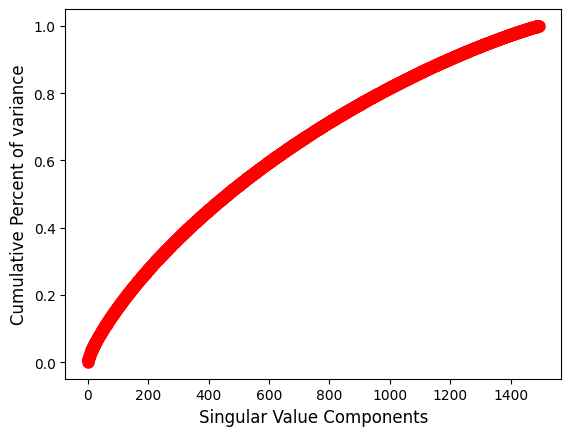

In [38]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=5000)
latent_matrix=svd.fit_transform(tf_df)
explained=svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=16,color='red')
plt.xlabel('Singular Value Components',fontsize=12)
plt.ylabel('Cumulative Percent of variance',fontsize=12)
plt.show()

In [39]:
latent_matrix.shape

(1494, 1494)

In [40]:
latent_similarity=cosine_similarity(latent_matrix)

NameError: name 'cosine_similarity' is not defined

In [ ]:
def recommend_tfidf(movie):
    movie_index=new[new['title']==movie].index[0]
    distances=latent_similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x: x[1])[1:6]
    for i in movies_list:
        print(new.iloc[i[0]].title)

In [ ]:
recommend_tfidf('Jurassic World')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(vectors)

In [ ]:
similarity[0]

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x: x[1])

In [ ]:
def recommend(movie):
    movie_index=new[new['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x: x[1])[1:6]
    for i in movies_list:
        print(new.iloc[i[0]].title)

In [ ]:
recommend('Iron Man')